<br>

## APLICACAO DE ENCODER E IMPORT DE DATASET

<hr>

In [104]:
import pandas as pd
from sklearn.preprocessing import TargetEncoder

In [105]:
raw_df = pd.read_csv('ordinal_encoding_mushrooms.csv')

In [234]:
raw_df['label'].value_counts()

label
0    4208
1    3916
Name: count, dtype: int64

In [107]:
#Mudança do valor do label para binário 1 = venenoso // 0 = não venenoso ou comestivel
raw_df['label'] = raw_df['label'].map({'p': 1, 'e': 0})

In [201]:
#valor de Smooth de 10 a 3000
dfs_aux1 = {}
for i in range(10, 3000, 5):
    df_aux = raw_df.copy()
    encode = TargetEncoder(smooth = i)
    dfs_aux1[i] = encode.fit_transform(df_aux.drop('label', axis=1), df_aux['label'])

In [109]:
#valor de Smooth de 10 a 50
dfs_aux2 = {}
for i in range(10, 51):
    df_aux = raw_df.copy()
    encode = TargetEncoder(smooth = i)
    dfs_aux2[i] = encode.fit_transform(df_aux.drop('label', axis=1), df_aux['label'])

In [110]:
#valor de Smooth de 50 a 100
dfs_aux3 = {}
for i in range(50, 101):
    df_aux = raw_df.copy()
    encode = TargetEncoder(smooth = i)
    dfs_aux3[i] = encode.fit_transform(df_aux.drop('label', axis=1), df_aux['label'])

In [111]:
#valor de Smooth de 100 a 1000
dfs_aux4 = {}
for i in range(100, 1001):
    df_aux = raw_df.copy()
    encode = TargetEncoder(smooth = i)
    dfs_aux4[i] = encode.fit_transform(df_aux.drop('label', axis=1), df_aux['label'])

In [112]:
#valor de Smooth de 1000 a 2000
dfs_aux5 = {}
for i in range(1000, 2001):
    df_aux = raw_df.copy()
    encode = TargetEncoder(smooth = i)
    dfs_aux5[i] = encode.fit_transform(df_aux.drop('label', axis=1), df_aux['label'])

In [113]:
#valor de Smooth de 2000 a 3000
dfs_aux6 = {}
for i in range(2000, 3001):
    df_aux = raw_df.copy()
    encode = TargetEncoder(smooth = i)
    dfs_aux6[i] = encode.fit_transform(df_aux.drop('label', axis=1), df_aux['label'])

In [114]:
#valor de Smooth de 3000 a 4000
dfs_aux7 = {}
for i in range(3000, 4001):
    df_aux = raw_df.copy()
    encode = TargetEncoder(smooth = i)
    dfs_aux7[i] = encode.fit_transform(df_aux.drop('label', axis=1), df_aux['label'])

In [115]:
#valor de Smooth de 4000 a 5000
dfs_aux8 = {}
for i in range(4000, 5001):
    df_aux = raw_df.copy()
    encode = TargetEncoder(smooth = i)
    dfs_aux8[i] = encode.fit_transform(df_aux.drop('label', axis=1), df_aux['label'])

<br>

## Aplicação Do Modelo

<hr>

In [1]:
## Imports
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [117]:
y = df_aux['label']
kfold=KFold(n_splits=5, shuffle=True, random_state=0)

In [203]:
#valor de Smooth de 0 a 3000
scores_results = {}
X_results = {}
scaler = StandardScaler()
for dfs in dfs_aux1:
    X_results[dfs] = pd.DataFrame(dfs_aux1[dfs])
    X_train, X_test, y_train, y_test = train_test_split(X_results[dfs], y, test_size = 0.2, random_state = 42)
    X_train = pd.DataFrame(X_train)
    cols = X_train.columns
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=[cols])
    X_test = pd.DataFrame(X_test, columns=[cols])
    classifier = svm.SVC(kernel='rbf', C=2, gamma='auto').fit(X_train, y_train)
    y_pred_test1 = classifier.predict(X_test)
    scores_results[dfs] = cross_val_score(classifier, X_results[dfs], y, cv=kfold, scoring = 'accuracy')

Text(0, 0.5, 'Accuracy')

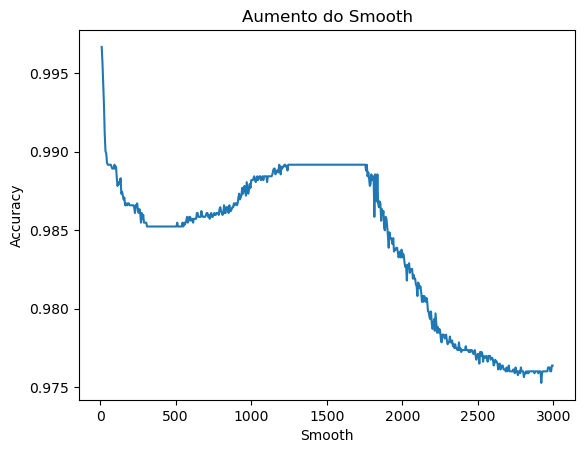

In [214]:
pd.DataFrame(data=scores_results).mean().plot()
plt.title('Aumento do Smooth')
plt.xlabel('Smooth')
plt.ylabel('Accuracy')


In [216]:
scores_results[1500]

0.9891676392572943

In [231]:
scores= cross_val_score(classifier, X_results[1500], y, cv=kfold, scoring = 'f1_macro')
scores.mean()

<br>

## Modelo Dummy

<hr>

In [3]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier().fit(X_train, y_train)
scoresss=cross_val_score(dummy_clf, X_results6[2000], y, cv=kfold, scoring='accuracy')
scoresss